In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

#from helper_functions import do_pca, scree_plot, plot_components, pca_results
from IPython import display
#import test_code2 as t

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
data = pd.read_csv("/content/drive/MyDrive/thesis/clickstream_data.csv", delimiter=";")

In [ ]:
data.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [ ]:
data.shape

(165474, 14)

This dataset has 165474 entries and 14 features

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

# Exploratory Data Analysis

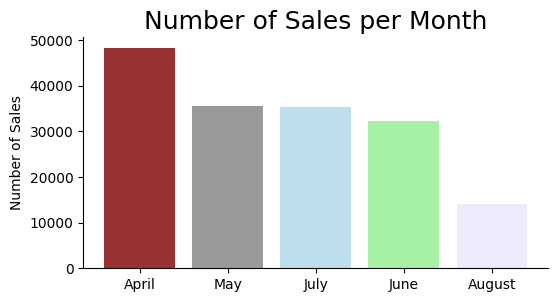

In [ ]:
### New dataframe relevant columns
csdf = data[['month', 'day', 'page 1 (main category)', 'price', 'page']]
csdf = csdf.rename(columns={'month':'Month', 'day':'Day', 'page 1 (main category)':'Type',
                     'price':'Price', 'page':'Page'})
csdf.Type = csdf.Type.replace({1: 'Trousers', 2: 'Skirts', 3: 'Blouses', 4: 'Sale'})
csdf.Month = csdf.Month.replace({4: 'April', 5: 'May', 6: 'June', 7:'July', 8: 'August'})
### Number of goods sold each month
csmsm = csdf.Month.value_counts()

fig , ax = plt.subplots(figsize = [6,3])

ax.bar(csmsm.keys(), csmsm.values, color=['maroon','gray','lightblue','lightgreen','lavender'], alpha=.8)

ax.set_title('Number of Sales per Month', fontsize = 18)
ax.set_ylabel('Number of Sales')
ax.spines[['right', 'top']].set_visible(False)

plt.show()

In [ ]:
csau = csdf.loc[csdf['Month'] == "August"]
csjn =csdf.loc[csdf['Month'] == "June"]
csjl = csdf.loc[csdf['Month'] == "July"]
csmy = csdf.loc[csdf['Month'] == "May"]
csap = csdf.loc[csdf['Month'] == "April"]

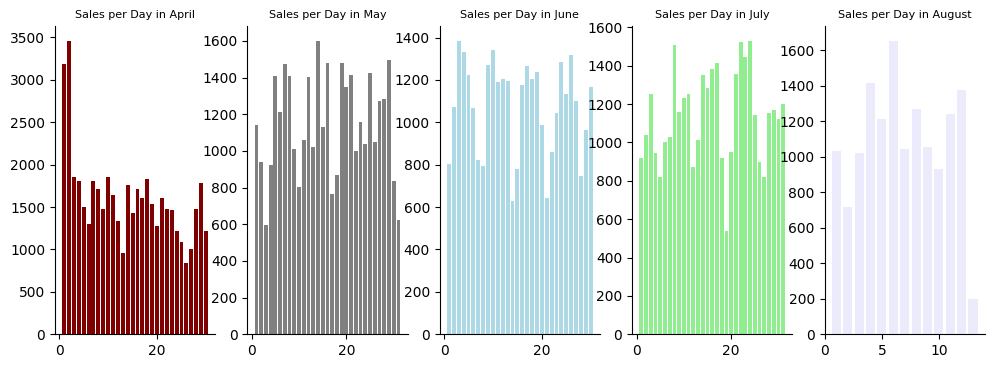

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols = 5, figsize=[12,4])
axs[0].bar(csap.Day.value_counts().keys(), csap.Day.value_counts().values, color='maroon')
axs[1].bar(csmy.Day.value_counts().keys(), csmy.Day.value_counts().values, color='gray')
axs[2].bar(csjn.Day.value_counts().keys(), csjn.Day.value_counts().values, color='lightblue')
axs[3].bar(csjl.Day.value_counts().keys(), csjl.Day.value_counts().values, color='lightgreen')
axs[4].bar(csau.Day.value_counts().keys(), csau.Day.value_counts().values, color='lavender', alpha=.8)

# Set titles and hide unnecessary spines
axs[0].set_title('Sales per Day in April', fontsize=8)
axs[1].set_title('Sales per Day in May', fontsize=8)
axs[2].set_title('Sales per Day in June', fontsize=8)
axs[3].set_title('Sales per Day in July', fontsize=8)
axs[4].set_title('Sales per Day in August', fontsize=8)

axs[0].spines[['right', 'top']].set_visible(False)
axs[1].spines[['right', 'top']].set_visible(False)
axs[2].spines[['right', 'top']].set_visible(False)
axs[3].spines[['right', 'top']].set_visible(False)
axs[4].spines[['right', 'top']].set_visible(False)


# Display the figure
plt.show()

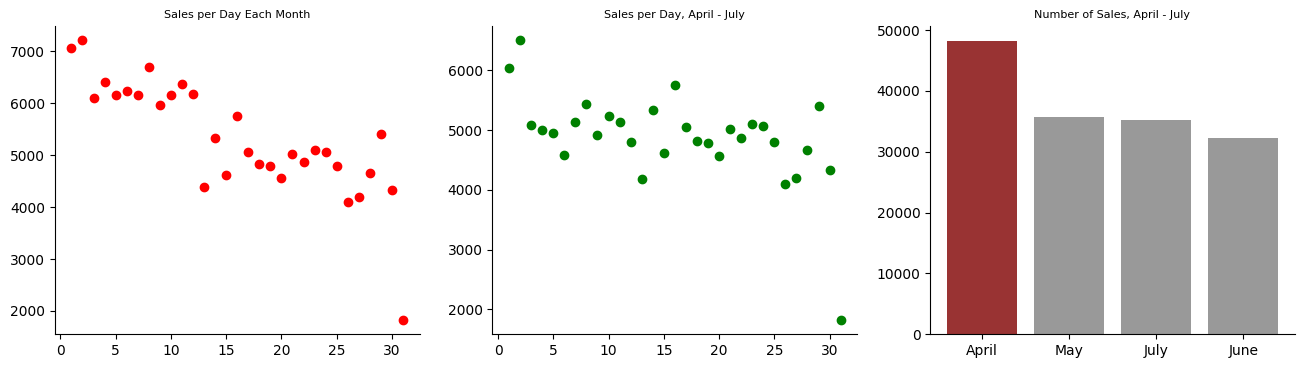

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols = 3, figsize=[16,4])

axs[0].scatter(csdf.Day.value_counts().keys(), csdf.Day.value_counts().values, color='red')
axs[0].set_title('Sales per Day Each Month', fontsize = 8)
axs[0].spines[['right', 'top']].set_visible(False)

csna = csdf.loc[csdf['Month'] != 'August']
csnac = csna.Month.value_counts()

axs[1].scatter(csna.Day.value_counts().keys(), csna.Day.value_counts().values, color='green')
axs[1].set_title('Sales per Day, April - July', fontsize = 8)
axs[1].spines[['right', 'top']].set_visible(False)

axs[2].bar(csnac.keys(), csnac.values, color=['maroon','gray','gray','gray'], alpha=.8)
axs[2].set_title('Number of Sales, April - July', fontsize = 8)
axs[2].spines[['right', 'top']].set_visible(False)

plt.show()

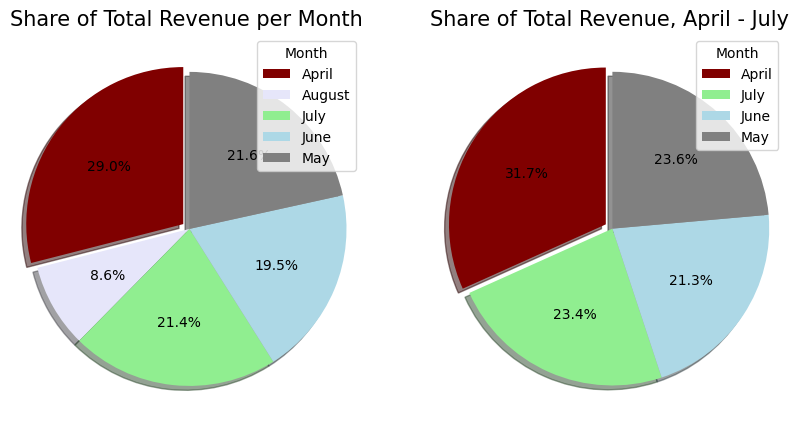

In [ ]:
csmp = csdf[['Month', 'Price']]
csmpna = csna[['Month', 'Price']]
csmp2 = csmp.groupby('Month').sum()
csmpna2 = csmpna.groupby('Month').sum()

l1 = csmp2.index
l2 = csmpna2.index

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[10,5])
ax[0].pie(csmp2.Price, explode=(0.05, 0, 0, 0, 0), autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['maroon', 'lavender', 'lightgreen', 'lightblue', 'gray'])
ax[0].axis('equal')
ax[0].set_title("Share of Total Revenue per Month", fontsize=15)
ax[0].legend(l1, title="Month", loc="upper right")

ax[1].pie(csmpna2.Price, explode=(0.05, 0, 0, 0), autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['maroon', 'lightgreen', 'lightblue', 'gray'])
ax[1].axis('equal')
ax[1].set_title("Share of Total Revenue, April - July", fontsize=15)
ax[1].legend(l2, title="Month", loc="upper right")

plt.show()

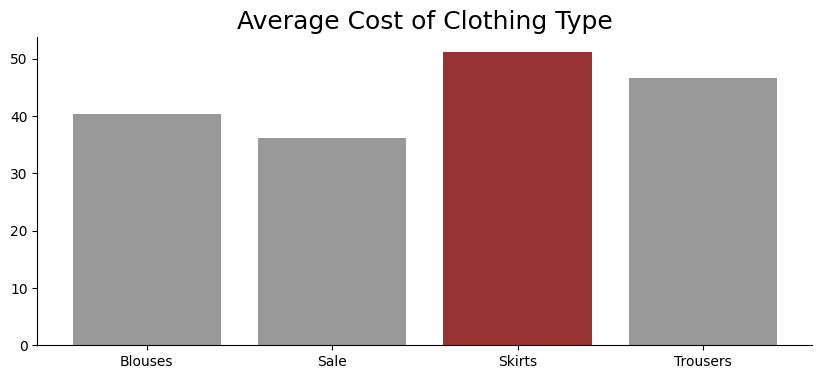

In [ ]:
### Number of types of clothing sold
csctc = csdf.Type.value_counts()
### Monetary amount sold per type of clothing
csctr = csdf[['Type', 'Price']]
cscts = csctr.groupby('Type').sum()
cscta = csctr.groupby('Type').mean()

csct = cscts
csct['Total'] = csctc
csct['Average'] = cscta['Price']
csct = csct.rename(columns={'Price' : 'Value'})

fig, ax = plt.subplots(figsize = [10,4])

ax.bar(csct.index, csct.Average, color = ['gray', 'gray', 'maroon', 'gray'], alpha = .8)
ax.set_title('Average Cost of Clothing Type', fontsize=18)
ax.spines[['right', 'top']].set_visible(False)

plt.show()

In [ ]:
csdf.corr()

<ipython-input-32-ae91b3f32c8a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  csdf.corr()


,Day,Price,Page
Day,1.000000,-0.002818,0.011125
Price,-0.002818,1.000000,-0.150455
Page,0.011125,-0.150455,1.000000


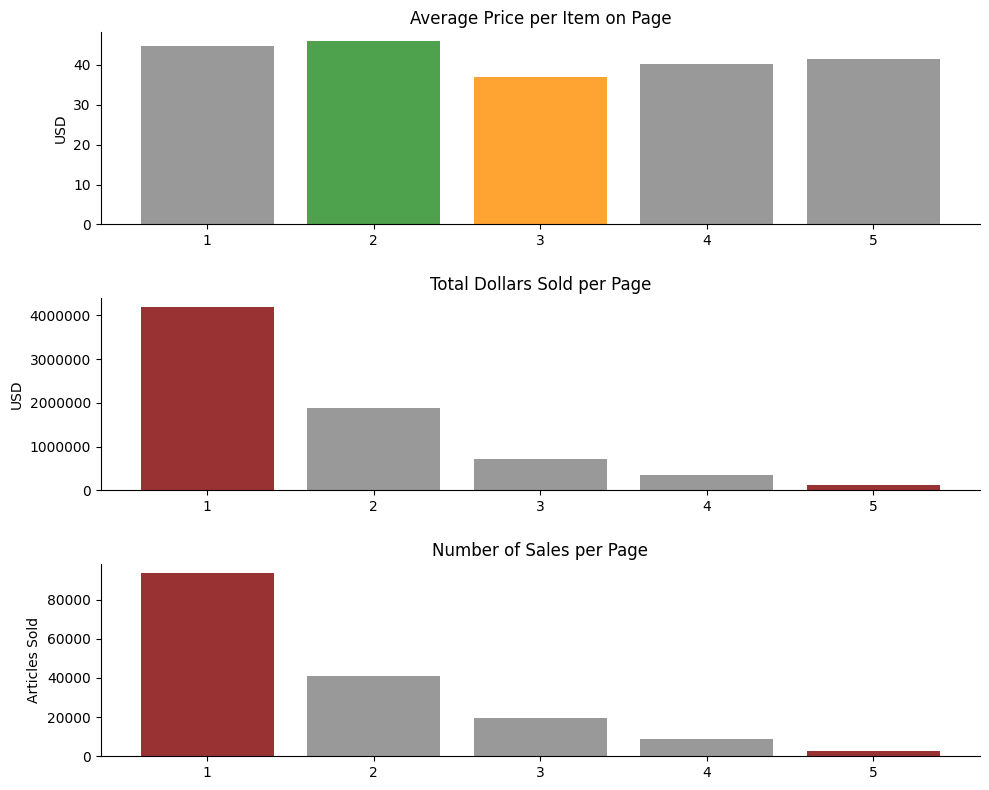

In [ ]:
cspp = csdf[['Price', 'Page']]

ppavg = cspp.groupby('Page').mean()
pptot = cspp.groupby('Page').sum()
ppcnt = cspp.Page.value_counts()

ppdf = ppavg
ppdf['Total'] = pptot.Price
ppdf['Count'] = ppcnt
ppdf = ppdf.rename(columns={'Price':'Average'})

fig, axs = plt.subplots(nrows=3, ncols = 1, figsize=[10, 8])

axs[0].bar(ppdf.index, ppdf.Average,
           color=['gray', 'forestgreen', 'darkorange', 'gray', 'gray'], alpha=.8)
axs[0].set_title('Average Price per Item on Page', fontsize=12)
axs[0].set_ylabel('USD')

axs[1].bar(ppdf.index, ppdf.Total,
           color=['maroon', 'gray', 'gray', 'gray', 'maroon'], alpha=.8)
axs[1].set_title('Total Dollars Sold per Page', fontsize=12)
axs[1].set_ylabel('USD')
axs[1].ticklabel_format(useOffset=False, style='plain')

axs[2].bar(ppdf.index, ppdf.Count,
           color=['maroon', 'gray', 'gray', 'gray', 'maroon'], alpha=.8)
axs[2].set_title('Number of Sales per Page', fontsize=12)
axs[2].set_ylabel('Articles Sold')

for ax in axs:
    ax.yaxis.grid(False)
    ax.spines[['right', 'top']].set_visible(False)
plt.tight_layout(h_pad=2)
plt.show()

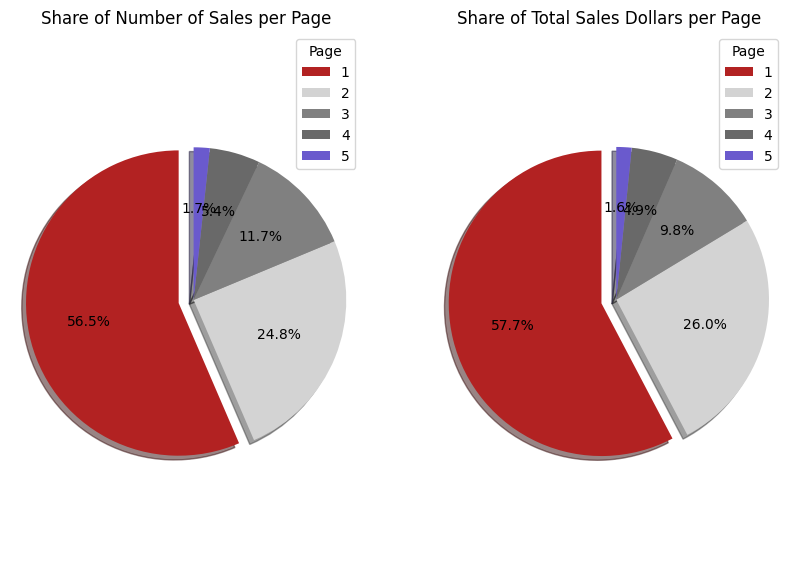

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[10,7])
ax[0].pie(ppdf.Count, explode=(0.1, 0, 0, 0, 0), autopct='%1.1f%%',
        shadow=True, startangle=90,
        colors=['firebrick', 'lightgray', 'gray', 'dimgray', 'slateblue'])
ax[0].axis('equal')
ax[0].set_title("Share of Number of Sales per Page", fontsize=12)
ax[0].legend(ppdf.index, title="Page", loc="upper right")

ax[1].pie(ppdf.Total, explode=(0.1, 0, 0, 0, 0), autopct='%1.1f%%',
        shadow=True, startangle=90,
        colors=['firebrick', 'lightgray', 'gray', 'dimgray', 'slateblue'])
ax[1].axis('equal')
ax[1].set_title("Share of Total Sales Dollars per Page", fontsize=12)
ax[1].legend(ppdf.index, title="Page", loc="upper right")

plt.show()

From the data description we can observe that certain categorical variables have been recognised as integer type, so we will convert them:

**year, month, day, country, session ID, page 1 (main category), page 2 (clothing model), colour, location, model photography, price 2, page.**

In [5]:
# Convert categorical variables to string
cat_vars = ['year', 'month', 'day', 'country', 'session ID',
               'page 1 (main category)', 'page 2 (clothing model)', 'colour',
               'location', 'model photography', 'price 2', 'page']
data[cat_vars] = data[cat_vars].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  object
 1   month                    165474 non-null  object
 2   day                      165474 non-null  object
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  object
 5   session ID               165474 non-null  object
 6   page 1 (main category)   165474 non-null  object
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  object
 9   location                 165474 non-null  object
 10  model photography        165474 non-null  object
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  object
 13  page                     165474 non-null  object
dtypes: int64(2), object(

This leaves **"order"** and **"price"** as the only numeric fields.

In [ ]:
# Check properties of numeric fields
data.describe()

,order,price
count,165474.000000,165474.000000
mean,9.817476,43.802507
std,13.478411,12.548131
min,1.000000,18.000000
25%,2.000000,33.000000
50%,6.000000,43.000000
75%,12.000000,52.000000
max,195.000000,82.000000


In [6]:
# Feature Engineering
df2 = data.groupby(['country','page 1 (main category)','page 2 (clothing model)']).agg(
                                                                             median_no_of_clicks_per_session=('order', 'median'),
                                                                             min_no_of_clicks_per_session=('order', 'max'),
                                                                             max_no_of_clicks_per_session=('order', 'min'),
                                                                             median_price=('price', 'median'),
                                                                             min_price=('price', 'max'),
                                                                             max_price=('price', 'min'),
                                                                             total_number_of_sessions =('session ID',lambda x: x.nunique()),
                                                                             most_frequent_day=('day', lambda x: np.argmax(np.bincount(x))),
                                                                             most_frequent_colour=('colour', lambda x: np.argmax(np.bincount(x))),
                                                                             most_frequent_location=('location', lambda x: np.argmax(np.bincount(x))),
                                                                             most_frequent_photo_type=('model photography', lambda x: np.argmax(np.bincount(x))),
                                                                             most_frequent_price_type =('price 2', lambda x: np.argmax(np.bincount(x))),
                                                                             most_frequent_page_number =('page', lambda x: np.argmax(np.bincount(x)))
                                                                            )

df2

median_no_of_clicks_per_session  \
country page 1 (main category) page 2 (clothing model)                                    
1       3                      C30                                                  2.0   
        4                      P17                                                  2.0   
10      1                      A1                                                   2.0   
                               A11                                                  2.0   
                               A12                                                  3.0   
...                                                                                 ...   
9       4                      P77                                                 18.0   
                               P78                                                  6.5   
                               P80                                                 96.0   
                               P82                                                 17.5   
                               P9                                                   3.0   

                                                        min_no_of_clicks_per_session  \
country page 1 (main category) page 2 (clothing model)                                 
1       3                      C30                                                 2   
        4                      P17                                                 3   
10      1                      A1                                                  2   
                               A11                                                 3   
                               A12                                                 5   
...                                                                              ...   
9       4                      P77                                                18   
                               P78                                                95   
                               P80                                                96   
                               P82                                                18   
                               P9                                                  4   

                                                        max_no_of_clicks_per_session  \
country page 1 (main category) page 2 (clothing model)                                 
1       3                      C30                                                 2   
        4                      P17                                                 1   
10      1                      A1                                                  2   
                               A11                                                 1   
                               A12                                                 1   
...                                                                              ...   
9       4                      P77                                                18   
                               P78                                                 1   
                               P80                                                96   
                               P82                                                17   
                               P9                                                  1   

                                                        median_price  \
country page 1 (main category) page 2 (clothing model)                 
1       3                      C30                              28.0   
        4                      P17                              38.0   
10      1                      A1                               28.0   
                               A11                              62.0   
                               A12                              38.0   
...                                                              ...   
9     

In [ ]:
df2.shape

(3141, 13)

**One hot encoding - to convert categorical data to continuous**

In this process, each category is represented by a binary vector where all elements are zero except for one element corresponding to the specific category. This method ensures that the model does not misinterpret the categorical data as having any ordinal relationship, thereby preserving the independence of each category. By employing one-hot encoding, categorical variables are transformed into a continuous numerical format, enabling algorithms to better understand and utilize the information provided by these variables in the analysis.

In [70]:
cat_vars = ['most_frequent_day',
           'most_frequent_colour', 'most_frequent_location',
           'most_frequent_photo_type', 'most_frequent_price_type',
           'most_frequent_page_number']
df2[cat_vars] = df2[cat_vars].astype(str)
df3 = pd.get_dummies(df2)
df3.shape

(3141, 67)

In [ ]:
df3.head()

median_no_of_clicks_per_session  \
country page 1 (main category) page 2 (clothing model)                                    
1       3                      C30                                                  2.0   
        4                      P17                                                  2.0   
10      1                      A1                                                   2.0   
                               A11                                                  2.0   
                               A12                                                  3.0   

                                                        min_no_of_clicks_per_session  \
country page 1 (main category) page 2 (clothing model)                                 
1       3                      C30                                                 2   
        4                      P17                                                 3   
10      1                      A1                                                  2   
                               A11                                                 3   
                               A12                                                 5   

                                                        max_no_of_clicks_per_session  \
country page 1 (main category) page 2 (clothing model)                                 
1       3                      C30                                                 2   
        4                      P17                                                 1   
10      1                      A1                                                  2   
                               A11                                                 1   
                               A12                                                 1   

                                                        median_price  \
country page 1 (main category) page 2 (clothing model)                 
1       3                      C30                              28.0   
        4                      P17                              38.0   
10      1                      A1                               28.0   
                               A11                              62.0   
                               A12                              38.0   

                                                        min_price  max_price  \
country page 1 (main category) page 2 (clothing model)                         
1       3                      C30                             28         28   
        4                      P17                             38         38   
10      1                      A1                              28         28   
                               A11                             62         62   
                               A12                             38         38   

                                                        total_number_of_sessions  \
country page 1 (main category) page 2 (clothing model)                             
1       3                      C30                                             1   
        4                      P17                                             1   
10      1                      A1                                              1   
                               A11                                             2   
                               A12                                             5   

                                                        most_frequent_day_1  \
country page 1 (main category) page 2 (clothing model)                        
1       3                      C30                                        0   
        4                      P17                                        0   
10      1                      A1                                         0   
                               A11                                        0   
                               A12                     

**Standardization**

Standardizing data involves transforming it to have a common scale or distribution, typically by subtracting the mean and dividing by the standard deviation (z-score standardization) or by scaling it to a specific range (min-max scaling). This process ensures that variables with different units or magnitudes can be compared directly, eliminating biases introduced by variations in scale. Standardization also helps stabilize statistical properties such as variance, making it easier to apply mathematical techniques like regression analysis, clustering, or machine learning algorithms.

In [71]:
con_vars = ['median_no_of_clicks_per_session', 'min_no_of_clicks_per_session',
           'max_no_of_clicks_per_session', 'median_price', 'min_price',
           'max_price', 'total_number_of_sessions']

scaler = StandardScaler()
df3[con_vars]=scaler.fit_transform(df3[con_vars])
df3.head(5)

median_no_of_clicks_per_session  \
country page 1 (main category) page 2 (clothing model)                                    
1       3                      C30                                            -0.784923   
        4                      P17                                            -0.784923   
10      1                      A1                                             -0.784923   
                               A11                                            -0.784923   
                               A12                                            -0.686829   

                                                        min_no_of_clicks_per_session  \
country page 1 (main category) page 2 (clothing model)                                 
1       3                      C30                                         -0.740009   
        4                      P17                                         -0.715043   
10      1                      A1                                          -0.740009   
                               A11                                         -0.715043   
                               A12                                         -0.665109   

                                                        max_no_of_clicks_per_session  \
country page 1 (main category) page 2 (clothing model)                                 
1       3                      C30                                         -0.445811   
        4                      P17                                         -0.550030   
10      1                      A1                                          -0.445811   
                               A11                                         -0.550030   
                               A12                                         -0.550030   

                                                        median_price  \
country page 1 (main category) page 2 (clothing model)                 
1       3                      C30                         -1.197785   
        4                      P17                         -0.367561   
10      1                      A1                          -1.197785   
                               A11                          1.624976   
                               A12                         -0.367561   

                                                        min_price  max_price  \
country page 1 (main category) page 2 (clothing model)                         
1       3                      C30                      -1.197785  -1.197785   
        4                      P17                      -0.367561  -0.367561   
10      1                      A1                       -1.197785  -1.197785   
                               A11                       1.624976   1.624976   
                               A12                      -0.367561  -0.367561   

                                                        total_number_of_sessions  \
country page 1 (main category) page 2 (clothing model)                             
1       3                      C30                                     -0.254235   
        4                      P17                                     -0.254235   
10      1                      A1                                      -0.254235   
                               A11                                     -0.248735   
                               A12                                     -0.232237   

                                                        most_frequent_day_1  \
country page 1 (main category) page 2 (clothing model)                        
1       3                      C30                                        0   
        4                      P17                                        0   
10      1                      A1                                         0   
                               A11                                        0   
                               A12                     

In [ ]:
#!pip install --trusted-host=pypi.org --trusted-host=files.pythonhosted.org --user opencv-python
#from helper_functions import do_pca,pca_results

**Principal Component Analysis**

PCA is essential because it simplifies complex data by identifying patterns and reducing dimensionality while retaining essential information. By transforming high-dimensional data into a lower-dimensional space defined by principal components, PCA helps in visualizing and understanding the underlying structure of the data. Additionally, PCA facilitates feature selection and noise reduction.

As of now we have created 67 features in the dataset from its original 14 features, hence we will try to use PCA so that maximum variance in the data can be explained by using fewer features.

In [72]:
# Loop Function to identify number of principal components
#that explain atleast 85% of the variance
for comp in range(3, df3.shape[1]):
    pca = PCA(n_components= comp, random_state=42)
    pca.fit(df3)
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.85:
        break

Final_PCA = PCA(n_components= final_comp,random_state=42)
Final_PCA.fit(df3)
cluster_df=Final_PCA.transform(df3)


num_comps = comp_check.shape[0]
print
("Using {} components, we can explain {}% of the variance in original data."
 .format(final_comp,round(comp_check.sum()*100, 3)))

'Using 15 components, we can explain 85.226% of the variance in original data.'

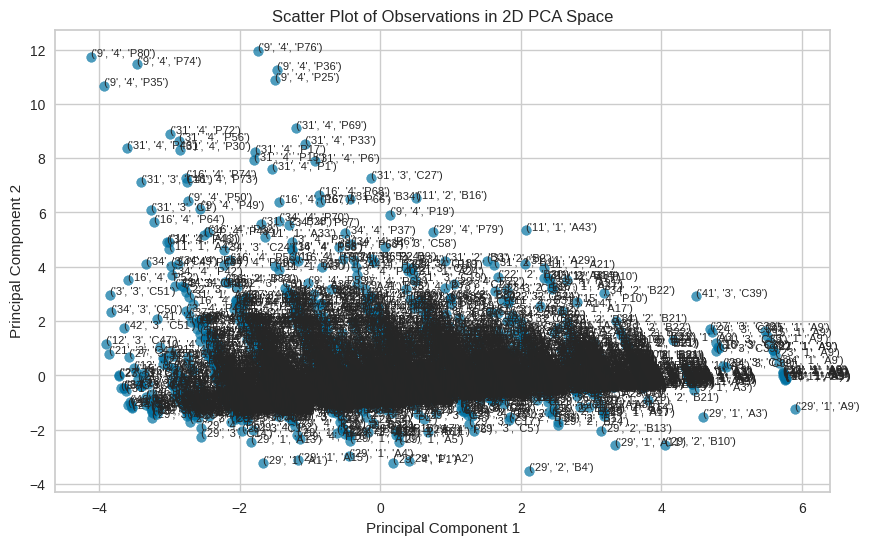

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(cluster_df[:, 0], # position on the first principal component of the observations
            cluster_df[:, 1], alpha=0.7) # position on the second principal component of the observations

# Add title and axis label
plt.title('Scatter Plot of Observations in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add labels to each point based on their index in the original dataframe
for i, txt in enumerate(df3.index):
    plt.annotate(txt, (cluster_df[i, 0], cluster_df[i, 1]), fontsize=8)
    # This might be useful when doing outlier detection

# Add grid in the background
plt.grid(True)

# Display the chart
plt.show()


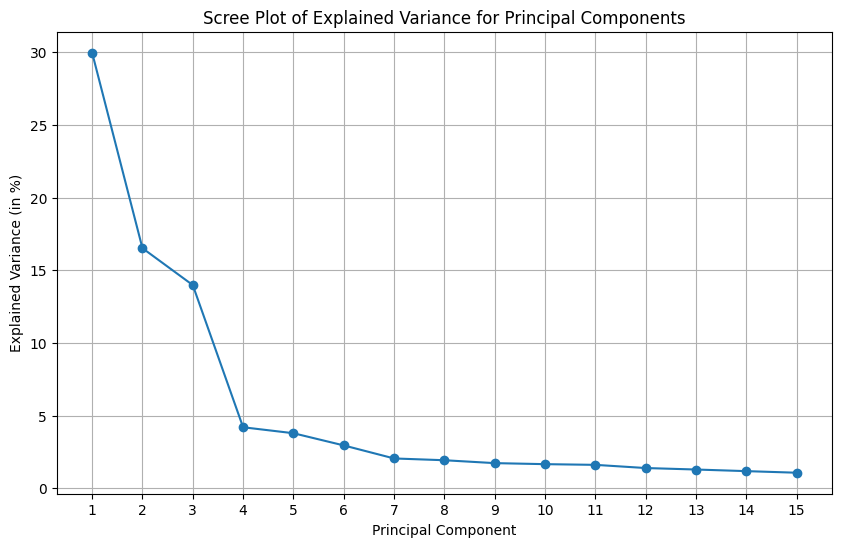

In [10]:
# Get the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Set figsize
plt.figure(figsize=(10, 6))

# Create a scree plot to visualize the explained variance
plt.plot(range(1, len(explained_variance) + 1), # x-axis
         explained_variance*100, # convert explained variance in percentage
         marker='o', # add a marker at each value
        )

# Add title and axis label
plt.title('Scree Plot of Explained Variance for Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (in %)')

# Add label to x-axis
plt.xticks(range(1, len(explained_variance) + 1))

# Add grid in the background
plt.grid(True)

# Display the chart
plt.show()

**cluster_df** contains the final transformed dataset that will be used.

# K MEANS

In [11]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

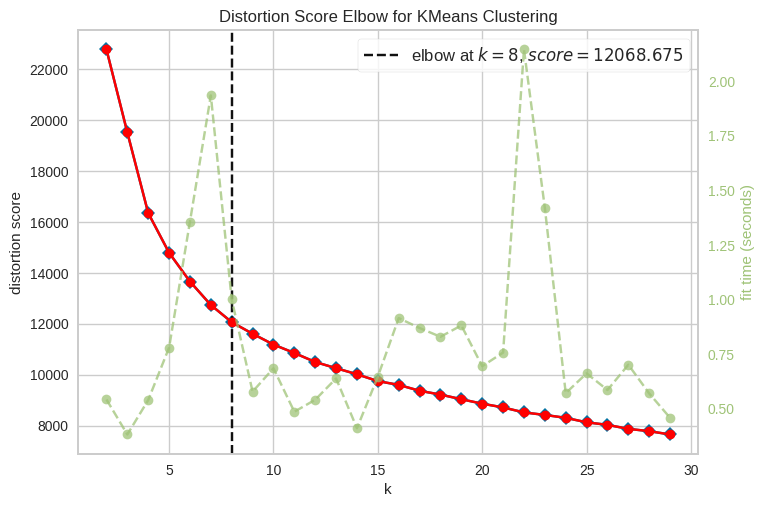

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [73]:
# Elbow Method for K means
from sklearn.cluster import KMeans
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(cluster_df) # Fit the data to the visualizer
visualizer.ax.plot(visualizer.k_values_, visualizer.k_scores_, marker='o', color='red')  # Change color to red
visualizer.show()        # Finalize and render the figure

**Elbow method**

In the context of k-means, obtaining an "elbow" in the plot of the within-cluster sum of squares (WCSS) against the number of clusters (k) is a common heuristic used to determine the optimal number of clusters. k=(2, 30): Specifies the range of values for k (the number of clusters) to explore. In this case, it ranges from 2 to 30 clusters. Obtaining an "elbow" in the plot suggests that adding more clusters beyond that point doesn't significantly decrease the WCSS by much. An elbow at k=8, it implies that adding more clusters beyond 8 doesn't substantially decrease the WCSS. In other words, the incremental gain in clustering quality decreases significantly after reaching 8 clusters. Therefore, k=8 might be considered a suitable choice for the number of clusters in this dataset.

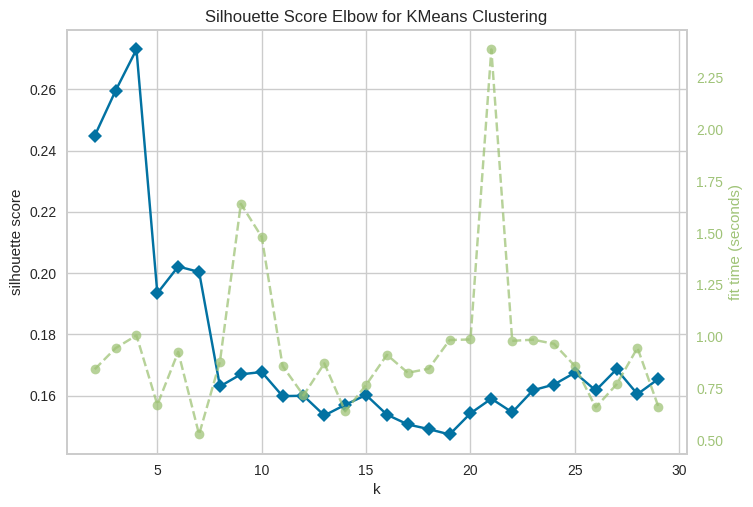

Optimal number of clusters based on silhouette score: [4]


In [13]:
# Silhouette Score for K means

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(cluster_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

**Silhouette Score**

The silhouette score is a metric used to evaluate the quality of clusters obtained through clustering. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, where:
A score close to +1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. A score close to 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters. A score close to -1 indicates that the object is assigned to the wrong cluster.
To determine the optimal number of clusters using silhouette score with k-means clustering, iterate over a range of values for k and compute the average silhouette score for each value of k. Then, you choose the value of k that maximizes the average silhouette score. Here that value of k = 4 for which the average silhouette score is closest to 1.

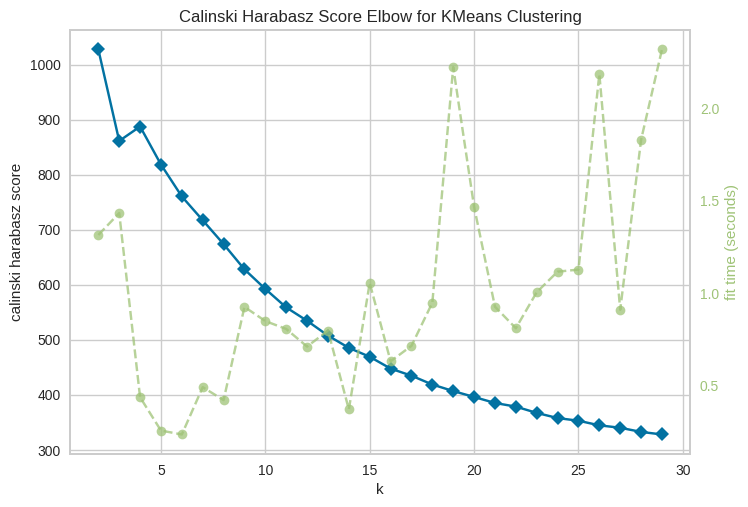

Optimal number of clusters based on calinski harabasz: [2]


In [14]:
# Calinski Harabasz Score for K means
model = KMeans(random_state =10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True, locate_elbow=False)
visualizer.fit(cluster_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on calinski harabasz:', df4['centers'].tolist())

Optimal number of clusters based on DB score: [4]


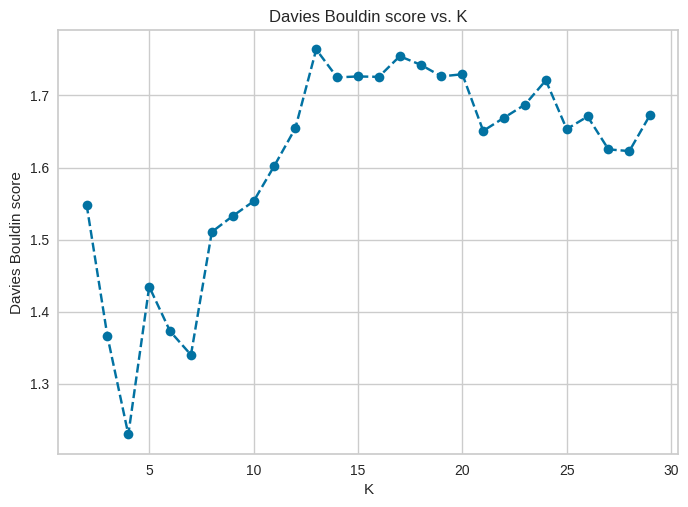

In [17]:
# Davies Bouldin score for K means

from sklearn.metrics import davies_bouldin_score

def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center,random_state =10)

    # Then fit the model to your data using the fit method
    model = kmeans.fit_predict(cluster_df)



    score = davies_bouldin_score(cluster_df, model)

    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_kmeans_score(cluster_df, center))

plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');


df3 = pd.DataFrame(centers,columns=['centers'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of clusters based on DB score:', df4['centers'].tolist())

In [75]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Create a data frame to store the scores
df = pd.DataFrame(columns=["k", "Silhouette Score", "Calinski Harabasz Score", "Davies Bouldin Score"])

# Calculate the scores for k=2
kmeans_2 = KMeans(n_clusters=2, random_state=10)
kmeans_2.fit(cluster_df)
score_2_s = silhouette_score(cluster_df, kmeans_2.labels_, metric='euclidean')
score_2_c = calinski_harabasz_score(cluster_df, kmeans_2.labels_)
score_2_d = davies_bouldin_score(cluster_df, kmeans_2.labels_)

# Calculate the scores for k=4
kmeans_4 = KMeans(n_clusters=4, random_state=10)
kmeans_4.fit(cluster_df)
score_4_s = silhouette_score(cluster_df, kmeans_4.labels_, metric='euclidean')
score_4_c = calinski_harabasz_score(cluster_df, kmeans_4.labels_)
score_4_d = davies_bouldin_score(cluster_df, kmeans_4.labels_)

# Calculate the scores for k=8
kmeans_8 = KMeans(n_clusters=8, random_state=10)
kmeans_8.fit(cluster_df)
score_8_s = silhouette_score(cluster_df, kmeans_8.labels_, metric='euclidean')
score_8_c = calinski_harabasz_score(cluster_df, kmeans_8.labels_)
score_8_d = davies_bouldin_score(cluster_df, kmeans_8.labels_)

# Add the scores to the data frame
df = df.append({"k": 2, "Silhouette Score": score_2_s, "Calinski Harabasz Score": score_2_c, "Davies Bouldin Score": score_2_d}, ignore_index=True)
df = df.append({"k": 4, "Silhouette Score": score_4_s, "Calinski Harabasz Score": score_4_c, "Davies Bouldin Score": score_4_d}, ignore_index=True)
df = df.append({"k": 8, "Silhouette Score": score_8_s, "Calinski Harabasz Score": score_8_c, "Davies Bouldin Score": score_8_d}, ignore_index=True)
# Print the data frame
print(df.to_string())


     k  Silhouette Score  Calinski Harabasz Score  Davies Bouldin Score
0  2.0          0.244841              1027.970215              1.548723
1  4.0          0.273049               887.930313              1.229810
2  8.0          0.162980               674.093192              1.510701


**Silhouette Score:**

The silhouette score measures how similar an object is to its own cluster compared to other clusters. In this case, a silhouette score of 0.2730 indicates a reasonable degree of separation between clusters, whereas, 0.162 is closer to 0 which means it is close to the decision boundary.

**Calinski-Harabasz Score:**

The Calinski-Harabasz score, also known as the Variance Ratio Criterion, measures the ratio of between-cluster dispersion to within-cluster dispersion. A higher Calinski-Harabasz score indicates better-defined clusters. In this case, a score of 887.9303 suggests that the clusters are well-separated.

**Davies-Bouldin Score:**

The Davies-Bouldin score evaluates the average similarity between each cluster and its most similar cluster, where similarity is a ratio of within-cluster distances to between-cluster distances. Lower values of the Davies-Bouldin score indicate better clustering. It is computed as the average similarity measure between each cluster and the most similar cluster, where the similarity measure is defined in terms of both the size of the clusters and the distance between their centroids. In this case, a score of 1.2298 suggests a moderate level of overlap between clusters and some degree of separation.

while k=2 and 8 show extremes for the three scores, k=4 shows a moderate separation so **k=4** will be used.

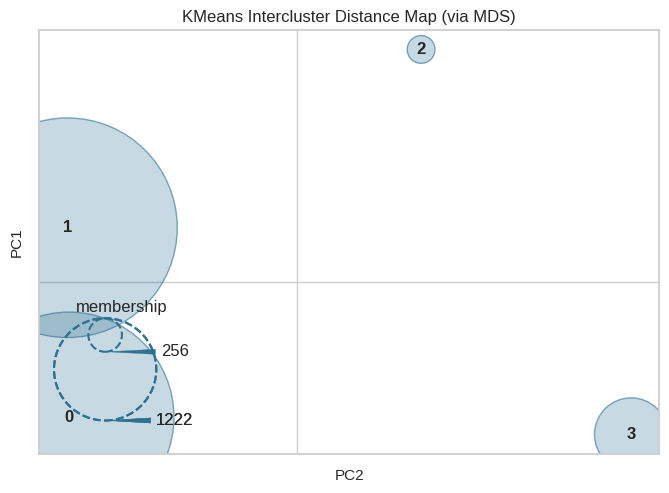

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [20]:
# Inter cluster distance map


from yellowbrick.cluster import InterclusterDistance
kmeans_1 = KMeans(n_clusters=4, random_state=42)
kmeans_1.fit(cluster_df)

# Instantiate the clustering model and visualizer

visualizer = InterclusterDistance(kmeans_1)
visualizer.fit(cluster_df)        # Fit the data to the visualizer
visualizer.show()

In [21]:
label = kmeans_1.fit_predict(cluster_df)
print(label)

[1 1 1 ... 2 0 1]


In [22]:
print(np.unique(label))


[0 1 2 3]


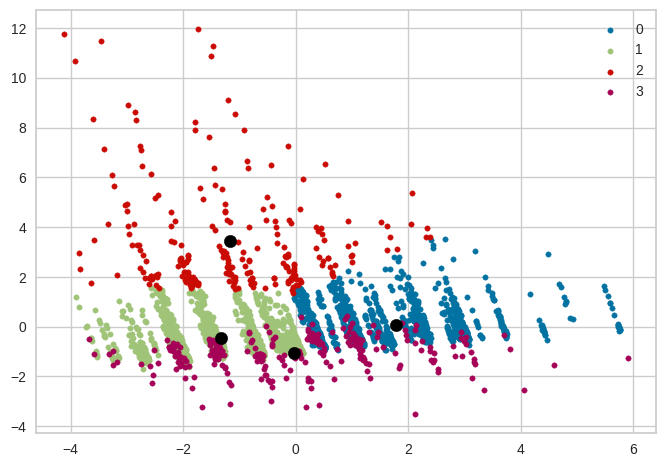

In [23]:
#Getting unique labels
centroids = kmeans_1.cluster_centers_
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(cluster_df[label == i , 0] , cluster_df[label == i , 1] , label = i, s=15)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = "black")
plt.legend()
plt.show()

#Heirarchical Clustering

In [25]:
# Elbow Method for Heirarchical Clustering
from sklearn.cluster import MiniBatchKMeans
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

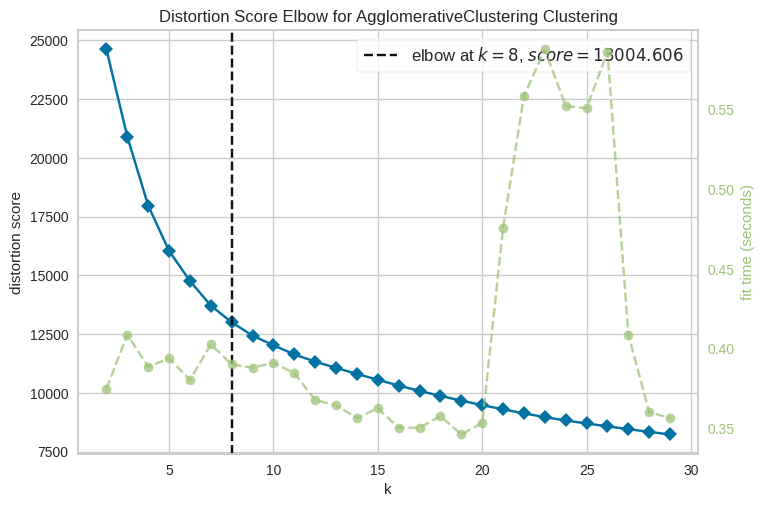

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [76]:
model2 = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model2, k=(2,30), timings= True)
visualizer.fit(cluster_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

**Elbow method:** k=8

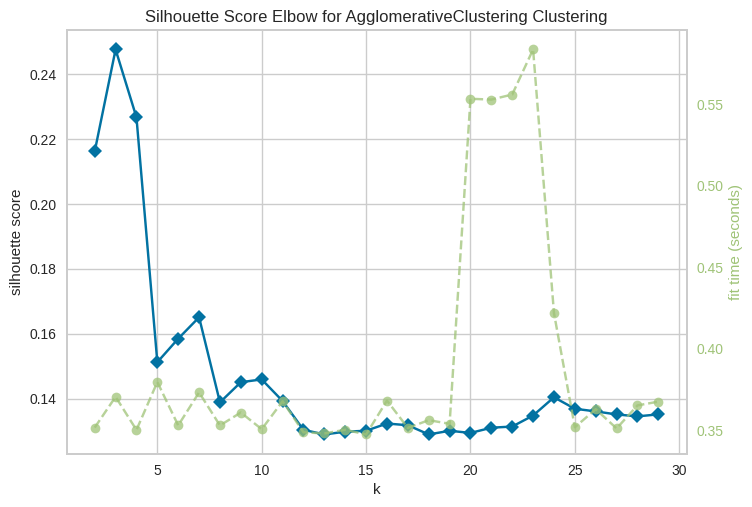

Optimal number of clusters based on silhouette score: [3]


In [77]:
# Silhouette Score for Hierarchical Clustering

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model2 = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model2, k=(2,30),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(cluster_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

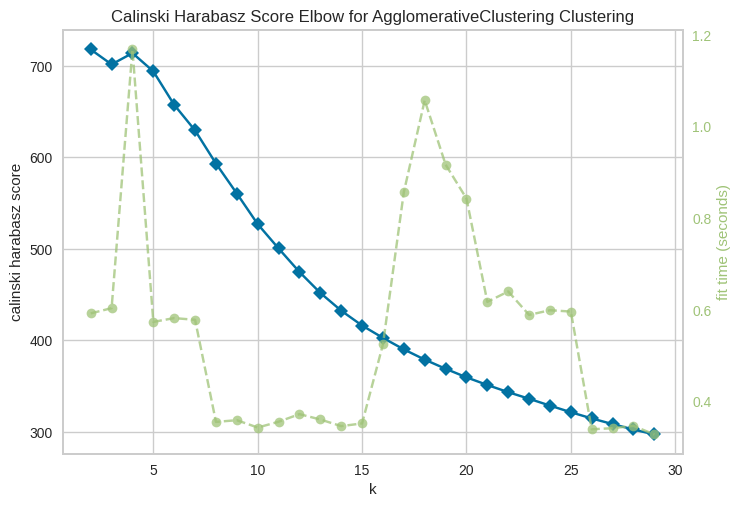

Optimal number of clusters based on silhouette score: [2]


In [28]:
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True, locate_elbow=False)
visualizer.fit(cluster_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

Optimal number of clusters based on DB score: [2]


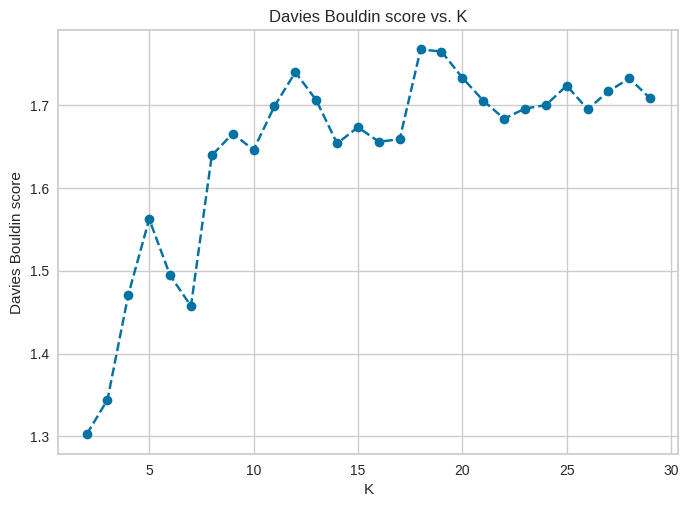

In [29]:
# Davies Bouldin score for Hierarchical Clustering

from sklearn.metrics import davies_bouldin_score

def get_AG_clustering_score(data, center):
    '''
    returns the AG_clustering score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit AG_clustering to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the AG_clustering model fit to the data
    '''
    #instantiate AG_clustering
    AG_clustering = AgglomerativeClustering(n_clusters= center)

    # Then fit the model to your data using the fit method
    model = AG_clustering.fit_predict(cluster_df)

    # Calculate Silhoutte Score

    score = davies_bouldin_score(cluster_df, model)

    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_AG_clustering_score(cluster_df, center))

plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');


df3 = pd.DataFrame(centers,columns=['centers'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of clusters based on DB score:', df4['centers'].tolist())

In [78]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Create a data frame to store the scores
df = pd.DataFrame(columns=["k", "Silhouette Score", "Calinski Harabasz Score", "Davies Bouldin Score"])

# Calculate the scores for k=2
model2 = AgglomerativeClustering(n_clusters = 2)
model2.fit(cluster_df)
score_2_s = silhouette_score(cluster_df, model2.labels_, metric='euclidean')
score_2_c = calinski_harabasz_score(cluster_df, model2.labels_)
score_2_d = davies_bouldin_score(cluster_df, model2.labels_)

# Calculate the scores for k=4
model4 = AgglomerativeClustering(n_clusters = 4)
model4.fit(cluster_df)
score_4_s = silhouette_score(cluster_df, model4.labels_, metric='euclidean')
score_4_c = calinski_harabasz_score(cluster_df, model4.labels_)
score_4_d = davies_bouldin_score(cluster_df, model4.labels_)

# Calculate the scores for k=3
model3 = AgglomerativeClustering(n_clusters = 3)
model3.fit(cluster_df)
score_3_s = silhouette_score(cluster_df,model3.labels_, metric='euclidean')
score_3_c = calinski_harabasz_score(cluster_df, model3.labels_)
score_3_d = davies_bouldin_score(cluster_df, model3.labels_)

# Add the scores to the data frame
df = df.append({"k": 2, "Silhouette Score": score_2_s, "Calinski Harabasz Score": score_2_c, "Davies Bouldin Score": score_2_d}, ignore_index=True)
df = df.append({"k": 4, "Silhouette Score": score_4_s, "Calinski Harabasz Score": score_4_c, "Davies Bouldin Score": score_4_d}, ignore_index=True)
df = df.append({"k": 3, "Silhouette Score": score_3_s, "Calinski Harabasz Score": score_3_c, "Davies Bouldin Score": score_3_d}, ignore_index=True)

# Print the data frame
print(df.to_string())


     k  Silhouette Score  Calinski Harabasz Score  Davies Bouldin Score
0  2.0          0.216205               718.059361              1.302222
1  4.0          0.226722               714.104844              1.471299
2  3.0          0.247664               701.729646              1.344140


**Dendogram:**

A dendrogram is a tree-like diagram used to represent the arrangement of clusters in hierarchical clustering. It visually displays how data points are grouped together at different levels of granularity.

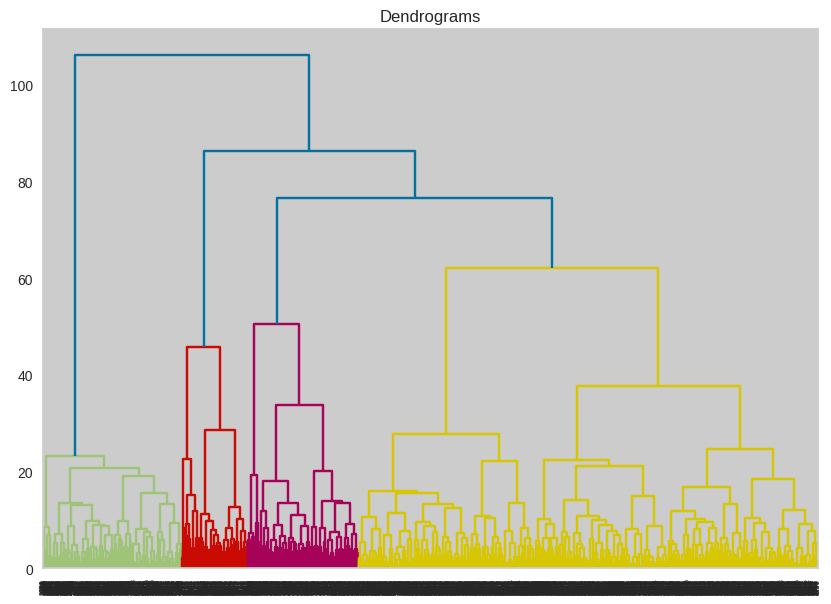

In [31]:
# Dendrogram for Hierarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))
pyplot.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(cluster_df, method='ward'))

**Agglomerative Clustering**:

Agglomerative clustering is a method used to group similar data points together to form clusters. It starts by treating each data point as its own cluster and then iteratively merges the closest pairs of clusters until all data points belong to a single cluster.

In [32]:
# Agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot

# define the model
model2 = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat = model2.fit(cluster_df)
yhat_2 = model2.fit_predict(cluster_df)
# retrieve unique clusters
clusters = unique(yhat)


# Calculate cluster validation metrics

score_AGclustering_s = silhouette_score(cluster_df, yhat.labels_, metric='euclidean')

score_AGclustering_c = calinski_harabasz_score(cluster_df, yhat.labels_)

score_AGclustering_d = davies_bouldin_score(cluster_df, yhat_2)



print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)

print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.2267
Calinski Harabasz Score: 714.1048
Davies Bouldin Score: 1.4713


Using k=4 for agglomerative clustering the three scores have been moderately good and close to what was observed for KMeans using k=4.

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

Designed to identify clusters in datasets based on the density of data points. Unlike traditional clustering algorithms that assume clusters have a particular shape, DBSCAN is capable of finding clusters of arbitrary shapes. It works by iteratively examining each data point and its neighborhood within a specified distance (epsilon or ε). Points with a minimum number of neighboring points within this distance are classified as core points and form the heart of a cluster. Points within the neighborhood of a core point but do not meet the density criterion become border points and are assigned to the same cluster. Points that do not meet the density criteria and are not reachable from any core point are labeled as noise points or outliers.

In [33]:
!pip install --upgrade kneed

1.9373665491095273


<Figure size 500x500 with 0 Axes>

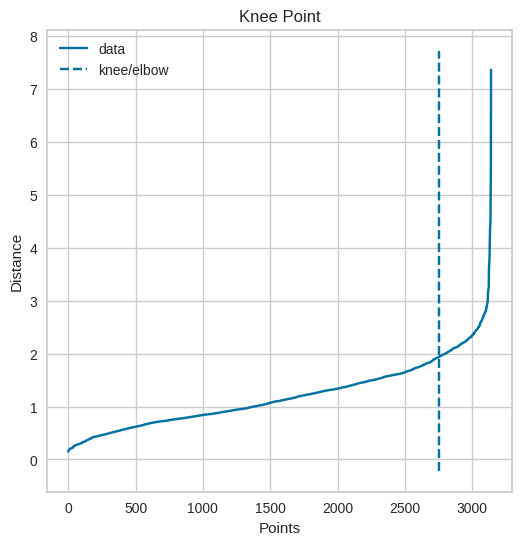

In [87]:
# parameter tuning for epsilon
import kneed
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(cluster_df)
distances, indices = neighbors.kneighbors(cluster_df)
distances = np.sort(distances[:,10], axis=0)

from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

The knee point refers to a point on the plot where there is a significant change in the rate of decrease of a metric, such as the within-cluster sum of squares (WCSS) or the average silhouette score, with respect to the number of clusters (k). This point often represents a trade-off between the goodness of fit (or clustering quality) and the complexity of the model (number of clusters).

The value 1.9373665491095273 likely indicates that the detected knee point corresponds to a distance or y-value of approximately 1.9373665491095273 on the curve being analyzed. This value signifies the point on the curve where there is a significant change in the slope.

In case of DBSCAN, this value is used as epsilon: **Epsilon** determines the maximum distance between two points for them to be considered as part of the same neighborhood.

Optimal number of min_samples based on silhouette score: [18]


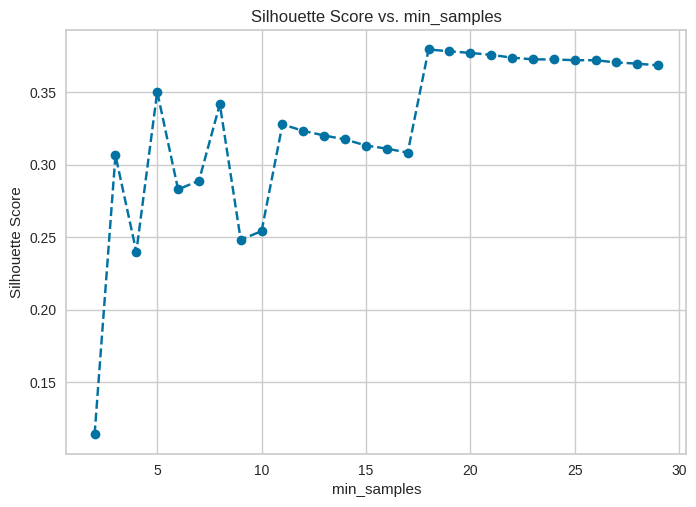

In [88]:
# Silhouette Score for DBSCAN

from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

def get_dbscan_score(data, center):
    '''

    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Silhouette Score for DBSCAN
    '''
    #instantiate kmeans
    dbscan = DBSCAN(eps= 1.9373665491095273, min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit(cluster_df)

    # Calculate Silhoutte Score

    score = silhouette_score(cluster_df, model.labels_, metric='euclidean')

    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(cluster_df, center))

plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score vs. min_samples');

df3 = pd.DataFrame(centers,columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of min_samples based on silhouette score:', df4['min_samples'].tolist())

Optimal number of min_sample based on Calinski Harabasz score: [29]


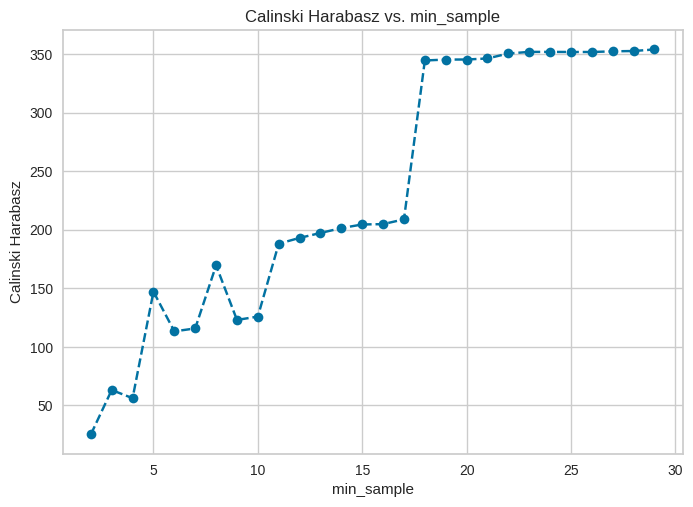

In [89]:
# Calinski Harabasz for DBSCAN

from sklearn.metrics import calinski_harabasz_score

def get_dbscan_score(data, center):
    '''

    INPUT:
        data - the dataset you want to fit dbscan to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Calinski Harabasz score for the dbscan model fit to the data
    '''
    #instantiate dbscan
    dbscan = DBSCAN(eps= 1.9373665491095273, min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit(cluster_df)

    # Calculate Silhoutte Score

    score = calinski_harabasz_score(cluster_df, dbscan.labels_)

    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(cluster_df, center))

plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_sample');
plt.ylabel('Calinski Harabasz');
plt.title('Calinski Harabasz vs. min_sample');

df3 = pd.DataFrame(centers,columns=['min_sample'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of min_sample based on Calinski Harabasz score:', df4['min_sample'].tolist())

Optimal number of min_samples based on DB score: [2]


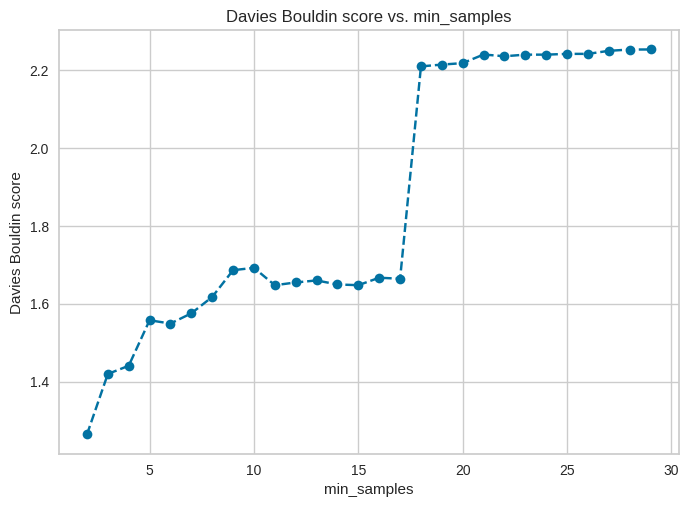

In [90]:
# Davies Bouldin score for DBSCAN

from sklearn.metrics import davies_bouldin_score

def get_dbscan_score(data, center):
    '''
    returns the dbscan score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit dbscan to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the dbscan model fit to the data
    '''
    #instantiate dbscan
    dbscan = DBSCAN(eps= 1.9373665491095273, min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit_predict(cluster_df)

    # Calculate Silhoutte Score

    score = davies_bouldin_score(cluster_df, model)

    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(cluster_df, center))

plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. min_samples');


df3 = pd.DataFrame(centers,columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of min_samples based on DB score:', df4['min_samples'].tolist())

In [92]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Create a data frame to store the scores
df = pd.DataFrame(columns=["min_samples", "Silhouette Score", "Calinski Harabasz Score", "Davies Bouldin Score"])

# Calculate the scores for 18
dbscan2 = DBSCAN(eps= 1.9373665491095273, min_samples=18)
dbscan2.fit(cluster_df)
score_2_s = silhouette_score(cluster_df, dbscan2.labels_, metric='euclidean')
score_2_c = calinski_harabasz_score(cluster_df, dbscan2.labels_)
score_2_d = davies_bouldin_score(cluster_df, dbscan2.labels_)

# Calculate the scores for 29
dbscan5 = DBSCAN(eps= 1.9373665491095273, min_samples=29)
dbscan5.fit(cluster_df)
score_5_s = silhouette_score(cluster_df, dbscan5.labels_, metric='euclidean')
score_5_c = calinski_harabasz_score(cluster_df, dbscan5.labels_)
score_5_d = davies_bouldin_score(cluster_df, dbscan5.labels_)

# Calculate the scores for 2
dbscan6 = DBSCAN(eps= 1.9373665491095273, min_samples=2)
dbscan6.fit(cluster_df)
score_6_s = silhouette_score(cluster_df,dbscan6.labels_, metric='euclidean')
score_6_c = calinski_harabasz_score(cluster_df, dbscan6.labels_)
score_6_d = davies_bouldin_score(cluster_df, dbscan6.labels_)

# Add the scores to the data frame
df = df.append({"min_samples": 18, "Silhouette Score": score_2_s, "Calinski Harabasz Score": score_2_c, "Davies Bouldin Score": score_2_d}, ignore_index=True)
df = df.append({"min_samples": 29, "Silhouette Score": score_5_s, "Calinski Harabasz Score": score_5_c, "Davies Bouldin Score": score_5_d}, ignore_index=True)
df = df.append({"min_samples": 2, "Silhouette Score": score_6_s, "Calinski Harabasz Score": score_6_c, "Davies Bouldin Score": score_6_d}, ignore_index=True)

# Print the data frame
print(df.to_string())

   min_samples  Silhouette Score  Calinski Harabasz Score  Davies Bouldin Score
0         18.0          0.379368               344.610817              2.209766
1         29.0          0.368405               354.009990              2.253176
2          2.0          0.113961                25.255659              1.264692


In [51]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
# define the model
model = DBSCAN(eps=0.7979451018855732, min_samples= 5)

# rule of thumb for min_samples: 2*len(cluster_df.columns)

# fit model and predict clusters
yhat = model.fit_predict(cluster_df)
# retrieve unique clusters
clusters = unique(yhat)


# Calculate cluster validation metrics

score_dbsacn_s = silhouette_score(cluster_df, yhat, metric='euclidean')

score_dbsacn_c = calinski_harabasz_score(cluster_df, yhat)

score_dbsacn_d = davies_bouldin_score(cluster_df, yhat)



print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: 0.1535
Calinski Harabasz Score: 20.8026
Davies Bouldin Score: 1.3123


 A higher value of **min_samples** results in more conservative clustering, where only denser regions are identified as clusters, potentially leading to fewer clusters with more points in each cluster. On the other hand, a lower value of **min_samples** can result in more points being labeled as noise, potentially producing more clusters with fewer points in each cluster.

 With a **higher epsilon**, DBSCAN considers a broader neighborhood around each core point, leading to larger clusters. With a **lower epsilon**, DBSCAN restricts the neighborhood around each core point to a smaller radius, leading to smaller, more tightly packed clusters.

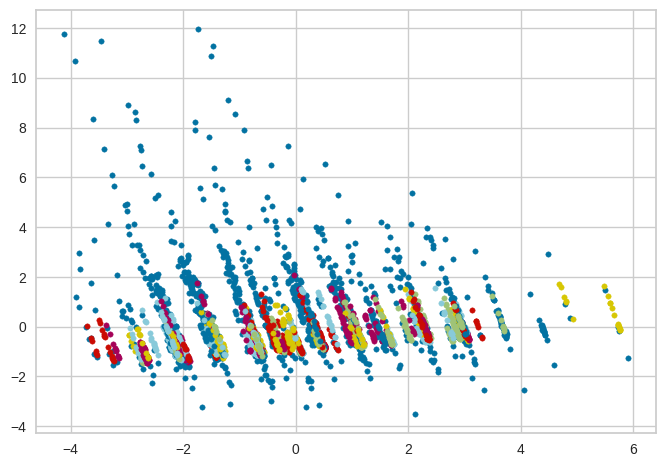

In [52]:
from sklearn.cluster import DBSCAN
from numpy import unique
dbscan_model = DBSCAN(eps=0.7979451018855732, min_samples=5)

# train the model
dbscan_model.fit(cluster_df)

dbscan_labels = dbscan_model.labels_

# get all of the unique clusters
dbscan_clusters = unique(dbscan_labels)

# plot the DBSCAN clusters
for dbscan_cluster in dbscan_clusters:
    # get data points that fall in this cluster
    index = where(dbscan_labels == dbscan_cluster)
    # make the plot
    pyplot.scatter(cluster_df[index, 0], cluster_df[index, 1], s=15)

# show the DBSCAN plot
pyplot.show()

# GMM (Gaussian Mixture Model)

It's a probabilistic clustering algorithm that models the data distribution as a mixture of multiple Gaussian distributions. In GMM clustering, each data point is assumed to belong to one of the Gaussian distributions, with the overall data distribution being a combination of these Gaussians. The algorithm iteratively assigns data points to clusters based on the probability of each point belonging to each Gaussian component, using the Expectation-Maximization (EM) algorithm.

In [93]:
# BIC for GMM

from sklearn.mixture import GaussianMixture
n_components = range(1, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        gmm.fit(cluster_df)
        score.append((cov,n_comp,gmm.bic(cluster_df)))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','BIC_Score']
score_2 = score_1[score_1.BIC_Score == score_1.BIC_Score.min()]

score_2.head(n=2)

,Covariance_Type,N_Components,BIC_Score
115,full,29,3693.396223


This code systematically explores different combinations of covariance type and number of components for GMM clustering and identifies the combination that minimizes the BIC score. We're testing clusters in the range of 1-30 with list of covariance types to be tested, including 'spherical', 'tied', 'diag', and 'full'. These covariance types determine the shape of the clusters in the GMM.

The output thus obtained shows that covariance type "full" was used and 29 components yielded the lowest BIC score of 3693.396223, suggesting that this combination of parameters provides the best balance between model fit and complexity among all the combinations tested. This combination may be considered the optimal choice for clustering the dataset based on the BIC criterion.

In [45]:
# Silhouette Score for GMM
n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov,random_state = 10)
        model = gmm.fit(cluster_df)
        model_2 = model.predict(cluster_df)
        score_s = silhouette_score(cluster_df, model_2, metric='euclidean')
        score.append((cov,n_comp,score_s))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Silhouette_Score']
score_2 = score_1[score_1.Silhouette_Score == score_1.Silhouette_Score.max()]
score_2.head(n=2)

,Covariance_Type,N_Components,Silhouette_Score
2,spherical,4,0.270456


In [46]:
# Calinski Harabasz Score for GMM


n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        model = gmm.fit(cluster_df)
        model_2 = model.predict(cluster_df)
        score_c = calinski_harabasz_score(cluster_df, model_2)
        score.append((cov,n_comp,score_c))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Calinski_Harabasz_Score']
score_2 = score_1[score_1.Calinski_Harabasz_Score == score_1.Calinski_Harabasz_Score.max()]
score_2.head(n=5)

,Covariance_Type,N_Components,Calinski_Harabasz_Score
28,tied,2,935.100413
84,full,2,935.100413


In [ ]:
# Davies Bouldin Score for GMM


n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        model = gmm.fit(cluster_df)
        model_2 = model.predict(cluster_df)
        score_d = davies_bouldin_score(cluster_df, model_2)
        score.append((cov,n_comp,score_d))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Davies_Bouldin_Score']
score_2 = score_1[score_1.Davies_Bouldin_Score == score_1.Davies_Bouldin_Score.max()]
score_2.head(n=2)

,Covariance_Type,N_Components,Davies_Bouldin_Score
91,full,9,4.011048


In [96]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define the model
model = GaussianMixture(n_components= 2,covariance_type= "full", random_state = 10)
# fit the model
model.fit(cluster_df)
# assign a cluster to each example
yhat = model.predict(cluster_df)
# retrieve unique clusters
clusters = unique(yhat)



# Calculate cluster validation score

score_gmm_s = silhouette_score(cluster_df, yhat, metric='euclidean')

score_gmm_c = calinski_harabasz_score(cluster_df, yhat)

score_gmm_d = davies_bouldin_score(cluster_df, yhat)



print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)


Silhouette Score: 0.2305
Calinski Harabasz Score: 935.1004
Davies Bouldin Score: 1.6439


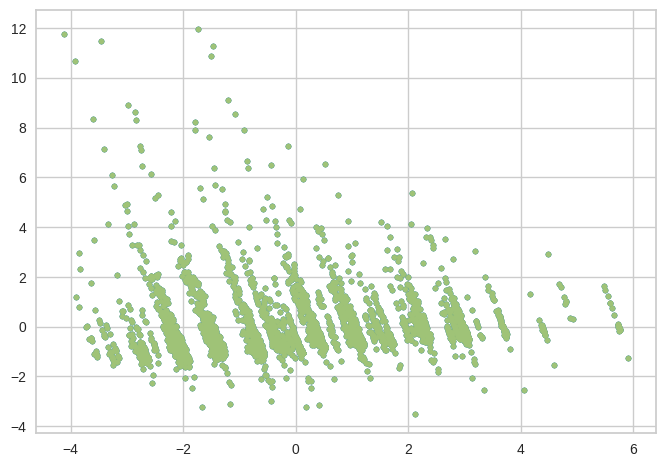

In [54]:
gaussian_model = GaussianMixture(n_components=2)

# train the model
gaussian_model.fit(cluster_df)

# assign each data point to a cluster
gaussian_result = gaussian_model.predict(cluster_df)

# get all of the unique clusters
gaussian_clusters = unique(gaussian_result).reshape(-1, 1)


# plot Gaussian Mixture the clusters
for gaussian_cluster in gaussian_clusters:
    # get data points that fall in this cluster
    index = where(gaussian_result == gaussian_clusters)
    # make the plot
    pyplot.scatter(cluster_df[index, 0],cluster_df[index, 1], s=15)

# show the Gaussian Mixture plot
pyplot.show()

# BIRCH (balanced Iterative Reducing and Clustering using Hierarchies)

It incrementally builds a tree-like structure to represent the data's clusters, making it scalable and memory-efficient. BIRCH first constructs a clustering feature tree (CF tree) by recursively partitioning the dataset into smaller and smaller subclusters. Each node in the CF tree represents a cluster, with a limited number of points and a bounding box to define its region. BIRCH employs a combination of clustering and outlier detection to construct the CF tree, making it robust to noise and outliers. Once the CF tree is built, BIRCH allows for fast cluster extraction based on user-defined parameters like the maximum diameter of subclusters.

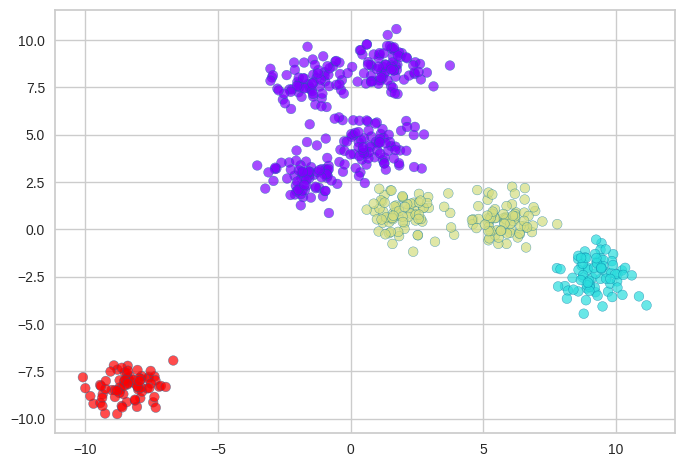

In [101]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch

model = Birch(branching_factor = 50, n_clusters = 4, threshold = 1.5)

model.fit(cluster_df)
pred = model.predict(cluster_df)

# Creating a scatter plot
plt.scatter(cluster_df[:, 0], cluster_df[:, 1], c = pred, cmap = 'rainbow', alpha = 0.7, edgecolors = 'b')
plt.show()

In [103]:
model = Birch(branching_factor = 50, n_clusters = 4, threshold = 1.5)

model.fit(cluster_df)
pred = model.predict(cluster_df)
score_s = silhouette_score(cluster_df, pred, metric='euclidean')

score_c = calinski_harabasz_score(cluster_df, pred)

score_d = davies_bouldin_score(cluster_df, pred)



print('Silhouette Score: %.4f' % score_s)
print('Calinski Harabasz Score: %.4f' % score_c)
print('Davies Bouldin Score: %.4f' % score_d)

Silhouette Score: 0.5603
Calinski Harabasz Score: 1590.7348
Davies Bouldin Score: 0.5424


In [61]:
!pip install fuzzy-c-means

  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.0.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.


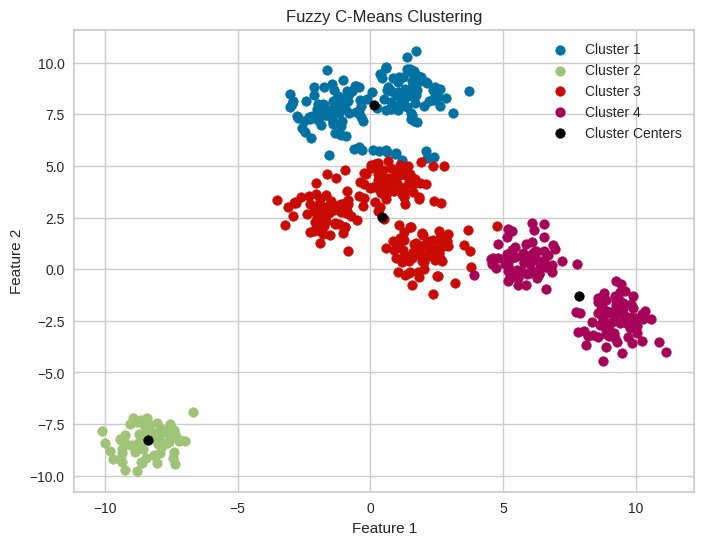

In [105]:
from fcmeans import FCM
fcm_model = FCM(n_clusters=4)
fcm_model.fit(cluster_df)
cluster_labels = fcm_model.predict(cluster_df)
cluster_centers = fcm_model.centers

plt.figure(figsize=(8, 6))
for i in range(4):
    cluster_points = cluster_df[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label="Cluster {}".format(i + 1))
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker="o", color="black", label="Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Fuzzy C-Means Clustering")
plt.legend()
plt.show()


In [64]:
fcm_model = FCM(n_clusters=4)

# Fit the model to the data
fcm_model.fit(cluster_df)

# Get the cluster labels
cluster_labels = fcm_model.predict(cluster_df)

score_s = silhouette_score(cluster_df, cluster_labels, metric='euclidean')

score_c = calinski_harabasz_score(cluster_df, cluster_labels)

score_d = davies_bouldin_score(cluster_df, cluster_labels)



print('Silhouette Score: %.4f' % score_s)
print('Calinski Harabasz Score: %.4f' % score_c)
print('Davies Bouldin Score: %.4f' % score_d)

Silhouette Score: 0.5775
Calinski Harabasz Score: 2081.4938
Davies Bouldin Score: 0.5598


In [67]:
df = pd.DataFrame(columns=["n", "Silhouette Score", "Calinski Harabasz Score", "Davies Bouldin Score"])

# Calculate the scores for 2
model2 = FCM(n_clusters=2)
model2.fit(cluster_df)
lab2 = model2.predict(cluster_df)
score_2_s = silhouette_score(cluster_df, lab2, metric='euclidean')
score_2_c = calinski_harabasz_score(cluster_df, lab2)
score_2_d = davies_bouldin_score(cluster_df, lab2)

# Calculate the scores for 4
model4 = FCM(n_clusters=4)
model4.fit(cluster_df)
lab4 = model4.predict(cluster_df)
score_4_s = silhouette_score(cluster_df, lab4, metric='euclidean')
score_4_c = calinski_harabasz_score(cluster_df, lab4)
score_4_d = davies_bouldin_score(cluster_df, lab4)

# Calculate the scores for 8
model8 = FCM(n_clusters=8)
model8.fit(cluster_df)
lab8 = model8.predict(cluster_df)
score_8_s = silhouette_score(cluster_df, lab8, metric='euclidean')
score_8_c = calinski_harabasz_score(cluster_df, lab8)
score_8_d = davies_bouldin_score(cluster_df, lab8)

# Add the scores to the data frame
df = df.append({"n": 2, "Silhouette Score": score_2_s, "Calinski Harabasz Score": score_2_c, "Davies Bouldin Score": score_2_d}, ignore_index=True)
df = df.append({"n": 4, "Silhouette Score": score_4_s, "Calinski Harabasz Score": score_4_c, "Davies Bouldin Score": score_4_d}, ignore_index=True)
df = df.append({"n": 8, "Silhouette Score": score_8_s, "Calinski Harabasz Score": score_8_c, "Davies Bouldin Score": score_8_d}, ignore_index=True)

# Print the data frame
print(df.to_string())

     n  Silhouette Score  Calinski Harabasz Score  Davies Bouldin Score
0  2.0          0.415507               314.493252              1.161548
1  4.0          0.577515              2081.493843              0.559795
2  8.0          0.639206              4129.422514              0.488694
